In [3]:
# Initialize Otter
import otter
grader = otter.Notebook("hw06.ipynb")

# Homework 6: Probability, Simulation, Estimation, and Assessing Models

### Note: do not worry if a "notebook validation failed" window pops up. Just press 'ok' and proceed normally.

**Helpful Resource:**
- [Python Reference](http://data8.org/su21/python-reference.html): Cheat sheet of helpful array & table methods used in Data 8!

**Reading**: 
* [Randomness](https://www.inferentialthinking.com/chapters/09/Randomness.html)
* [Sampling and Empirical Distributions](https://www.inferentialthinking.com/chapters/10/Sampling_and_Empirical_Distributions.html)
* [Testing Hypotheses](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html)

Please complete this notebook by filling in the cells provided. Before you begin, execute the following cell to load the provided tests. Each time you start your server, you will need to execute this cell again to load the tests.

For all problems that you must write explanations and sentences for, you **must** provide your answer in the designated space. **Make sure to explain your answer for written questions.** **Moreover, throughout this homework and all future ones, please be sure to not re-assign variables throughout the notebook!** For example, if you use `max_temperature` in your answer to one question, do not use it again it later on. Otherwise, you will fail tests that you thought you were passing previously!

**Deadline:**

This assignment is due Wednesday, July 14 at 11:59 P.M. PST. Late work will not be accepted as per the [policies](http://data8.org/su21/policies.html) page.


### **Note: This homework has hidden tests on it. That means even though tests may say 100% passed, doesn't mean your final grade will be 100%. We will be running more tests for correctness once everyone turns in the homework.**


Directly sharing answers is not okay, but discussing problems with the course staff or with other students is encouraged. Refer to the policies page to learn more about how to learn cooperatively.

You should start early so that you have time to get help if you're stuck. Office hours are held Monday-Friday. The schedule appears on [http://data8.org/su21/office-hours.html](http://data8.org/sp21/office-hours.html).

In [4]:
# Don't change this cell; just run it. 

import numpy as np
from datascience import *

# These lines do some fancy plotting magic.\n",
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

## Probability

We will be testing some probability concepts that were introduced in lecture. For all of the following problems, we will introduce a problem statement and give you a proposed answer. You must assign the provided variable to one of the following three integers, depending on whether the proposed answer is too low, too high, or correct. 

1. Assign the variable to 1 if you believe our proposed answer is correct.
2. Assign the variable to 2 if you believe our proposed answer is too high.
3. Assign the variable to 3 if you believe our proposed answer is too low. 

You are more than welcome to create more cells across this notebook to use for arithmetic operations 

**Question 1.** You roll a 6-sided die 10 times. What is the chance of getting 10 sixes?

Our proposed answer: $$\left(\frac{1}{6}\right)^{10}$$

Assign `ten_sixes` to either 1, 2, or 3. **(3 Points)**

<!--
BEGIN QUESTION
name: q1_1
manual: false
points:
 - 0
 - 3
-->

In [5]:
# chance of getting a six => 1/6 * 1/6 * ... (10 times)

In [6]:
ten_sixes = 1
ten_sixes

1

In [7]:
grader.check("q1_1")

q1_1 results: All test cases passed!

**Question 2.** Take the same problem set-up as before, rolling a fair dice 10 times. What is the chance that every roll is less than or equal to 5?

Our proposed answer: $$1 - \left(\frac{1}{6}\right)^{10}$$

Assign `five_or_less` to either 1, 2, or 3. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_2
manual: false
points:
 - 0
 - 4
-->

In [8]:
# (5/6)**10

In [9]:
five_or_less = 2
five_or_less

2

In [10]:
grader.check("q1_2")

q1_2 results: All test cases passed!

**Question 3.** Assume we pick a lottery ticket by writing three distinct numbers from 1 to 1000 on a ticket. Next, the lottery person draws three numbers one by one from a bowl with numbers from 1 to 1000 each time without putting the previous number back in. We win if the 3 numbers from our lottery ticket match the 3 numbers drawn from the bowl (must be in same order).

If we decide to play the game and pick our numbers as 12, 140, and 890, what is the chance that we win? 

Our proposed answer: $$\left(\frac{1}{1000}\right)^3$$

Assign `lottery` to either 1, 2, or 3. **(4 Points)**

<!--
BEGIN QUESTION
name: q1_3
manual: false
points:
 - 0
 - 4
-->

In [11]:
# 1/1000 * 1/999 * 1/998

In [12]:
lottery = 3
lottery

3

In [13]:
grader.check("q1_3")

q1_3 results: All test cases passed!

**Question 4.** Assume we have two lists, list A and list B. List A contains the numbers [20,10,20], while list B contains the numbers [40,10,30,20,40,30]. We choose one number from list A randomly and one number from list B randomly. What is the chance that the number we drew from list A is larger than or equal to the number we drew from list B?

Our proposed solution: $$1/3$$

Assign `list_chances` to either 1, 2, or 3. **(4 Points)**

*Hint: Consider the different possible ways that the items in List A can be greater than or equal to items in List B. Try working out your thoughts with a pencil and paper, what do you think the correct solutions will be close to?*

<!--
BEGIN QUESTION
name: q1_4
manual: false
points:
 - 0
 - 4
-->

In [14]:
# rand(list A) >= rand(list B)
# rand(list A) = 20 ==> 2/6
# rand(list A) = 10 ==> 1/6

# 2/6 * 2/6 * 1/6
# 1/3 * 1/3 * 1/6
# 1/54

In [15]:
list_chances = 2
list_chances

2

In [16]:
grader.check("q1_4")

q1_4 results: All test cases passed!

## Monkeys Typing Shakespeare
##### (...or at least the string "Data 8")

A monkey is banging repeatedly on the keys of a special typewriter. Each time, the monkey is equally likely to hit any of the 26 lowercase letters of the English alphabet, 26 uppercase letters of the English alphabet, any number between 0-9 (inclusive), and 1 space key, regardless of what it has hit before. There are no other keys on the keyboard.  

This question is inspired by a mathematical theorem called the Infinite monkey theorem (<https://en.wikipedia.org/wiki/Infinite_monkey_theorem>), which postulates that if you put a monkey in the situation described above for an infinite time, they will eventually type out all of Shakespeare’s works.

**Question 1.** Suppose the monkey hits the keyboard 6 times.  Compute the chance that the monkey types the sequence `Data 8`.  (Call this `data_chance`.) Use algebra and type in an arithmetic equation that Python can evalute. **(3 Points)**

<!--
BEGIN QUESTION
name: q2_1
manual: false
points:
 - 3
-->

In [17]:
total_char = 26 + 26 + 10 + 1
chance_D = 1/total_char
chance_a = 1/total_char
chance_t = 1/total_char
chance_space = 1/total_char
chance_8 = 1/total_char

In [18]:
data_chance = chance_D * chance_a * chance_t * chance_a * chance_space * chance_8
data_chance

1.5993985696086833e-11

In [19]:
grader.check("q2_1")

q2_1 results: All test cases passed!

**Question 2.** Write a function called `simulate_key_strike`.  It should take **no arguments**, and it should return a random one-character string that is equally likely to be any of the 26 lower-case English letters, 26 upper-case English letters, any number between 0-9 (inclusive), or the space key. **(4 Points)**

<!--
BEGIN QUESTION
name: q2_2
manual: false
points:
 - 0
 - 2
 - 2
-->

In [20]:
# We have provided the code below to compute a list called keys,
# containing all the lower-case English letters, upper-case English letters, the digits 0-9 (inclusive), and the 
# 1 space key.  Print it if you want to verify what it contains.
import string
keys = list(string.ascii_lowercase + string.ascii_uppercase + string.digits + " ")

def simulate_key_strike():
    """Simulates one random key strike."""
    return np.random.choice(keys)

# An example call to your function:
simulate_key_strike()

'c'

In [21]:
grader.check("q2_2")

q2_2 results: All test cases passed!

**Question 3.** Write a function called `simulate_several_key_strikes`.  It should take one argument: an integer specifying the number of key strikes to simulate. It should return a string containing that many characters, each one obtained from simulating a key strike by the monkey. **(3 Points)**

*Hint 1:* If you make a list or array of the simulated key strikes called `key_strikes_array`, you can convert that to a single string by calling `"".join(key_strikes_array)`

*Hint 2:* Think about how we can store our results for the different key strikes and how iteration is useful. 

<!--
BEGIN QUESTION
name: q2_3
manual: false
points:
 - 0
 - 1
 - 2
-->

In [22]:
def simulate_several_key_strikes(num_strikes):
    key_strikes_array = make_array()
    for i in np.arange(num_strikes):
        monkey_strike_value = simulate_key_strike()
        key_strikes_array = np.append(key_strikes_array, monkey_strike_value)
    return "".join(key_strikes_array)

# An example call to your function:
simulate_several_key_strikes(11)

'X2YIp2YY1AL'

In [23]:
grader.check("q2_3")

q2_3 results: All test cases passed!

**Question 4.** Call `simulate_several_key_strikes` 5000 times, each time simulating the monkey striking 6 keys.  Assign the proportion of times the monkey types `“Data 8”` to a variable called `data_proportion`. **(3 Points)**

<!--
BEGIN QUESTION
name: q2_4
manual: false
points:
 - 3
-->

In [24]:
num_times = 5000
simulated_array = make_array()
for i in np.arange(num_times):
    value = simulate_several_key_strikes(6)
    simulated_array = np.append(simulated_array, value)
    
data_proportion = np.count_nonzero(simulated_array == "Data 8") / len(simulated_array)
data_proportion

0.0

In [25]:
grader.check("q2_4")

q2_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 5.** Check the value your simulation computed for `data_proportion`.  Is simulation the best way to give us  the probability that the monkey types `"Data 8"` in 6 strikes (the answer to question 1)?  Why or why not? **(4 Points)**

*Hint:* Look back at what you got for `data_chance`.

<!--
BEGIN QUESTION
name: q2_5
manual: true
-->

_No simulation is not the best way because the chance of monkeys typing Data 8 is really really small (in the power of -11) and to find the actual probability through simulation we would have to simulate a lot more times. The simulation with 5000 times already takes long and having to run a lot more times would only slow down the simulating process._

<!-- END QUESTION -->

**Question 6.** Compute the chance that the monkey types the letter `"t"` or `"T"` at least once in the 6 strikes.  Call it `t_or_T_chance`. Use algebra and type in an arithmetic equation that Python can evalute. **(5 Points)**

<!--
BEGIN QUESTION
name: q2_6
manual: false
points:
 - 0
 - 5
-->

In [26]:
t_or_T_chance = 6 * 2/total_char
t_or_T_chance

0.19047619047619047

In [27]:
grader.check("q2_6")

q2_6 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 7.** Do you think that a computer simulation is more or less effective to estimate `t_or_T_chance` compared to when we tried to estimate `data_chance` this way? Why or why not? (You don't need to write a simulation, but it is an interesting exercise.) **(4 Points)**

*Hint:* Compare `t_or_T_chance` to `data_chance`.

<!--
BEGIN QUESTION
name: q2_7
manual: true
-->

_Yes computer simulation is more effective to estimate t_ot_T_chance compared to data_chance because probability of getting t_or_T_chance is much higher than data_chance which means we can run simulations effectively and be able to determine the probability of monkey typing t or T._

<!-- END QUESTION -->



## Sampling Basketball Players

This exercise uses salary data and game statistics for basketball players from the 2019-2020 NBA season. The data was collected from [Basketball-Reference](http://www.basketball-reference.com).

Run the next cell to load the two datasets.

In [28]:
player_data = Table.read_table('player_data.csv')
salary_data = Table.read_table('salary_data.csv')
player_data.show(3)
salary_data.show(3)

Player,3P,2P,PTS
Steven Adams,0,4.4,10.7
Bam Adebayo,0,6.2,15.8
LaMarcus Aldridge,1.2,6.3,19.1


Name,Salary
Stephen Curry,40231758
Chris Paul,38506482
Russell Westbrook,38178000


**Question 1.** We would like to relate players' game statistics to their salaries.  Compute a table called `full_data` that includes one row for each player who is listed in **both** `player_data` and `salary_data`.  It should include all the columns from `player_data` and `salary_data`, except the `"Name"` column. **(4 Points)**

<!--
BEGIN QUESTION
name: q3_1
manual: false
points:
 - 0
 - 2
 - 2
-->

In [29]:
full_data = player_data.join("Player", salary_data, "Name")
full_data

Player,3P,2P,PTS,Salary
Aaron Gordon,1.2,4.1,14.2,19863636
Aaron Holiday,1.5,2.2,9.9,2239200
Abdel Nader,0.7,1.3,5.7,1618520
Admiral Schofield,0.5,0.6,3.2,898310
Al Horford,1.4,3.4,12,28000000
Al-Farouq Aminu,0.5,0.9,4.3,9258000
Alec Burks,1.7,3.3,15.8,2320044
Alen Smailagić,0.3,1.3,4.7,898310
Alex Caruso,0.7,1.2,5.5,2750000
Alex Len,0.4,3.2,8.7,4160000


In [30]:
grader.check("q3_1")

q3_1 results: All test cases passed!

<!-- BEGIN QUESTION -->

Basketball team managers would like to hire players who perform well but don't command high salaries.  From this perspective, a very crude measure of a player's *value* to their team is the number of points for 3 pointers and free throws the player scored in a season for every **\$100000 of salary** (*Note*: the `Salary` column is in dollars, not hundreds of thousands of dollars). For example, Al Horford scored an average of 5.2 points for 3 pointers and free throws combined, and has a salary of **\$28 million.** This is equivalent to 280 thousands of dollars, so his value is $\frac{5.2}{280}$. The formula is:

$$\frac{\text{"PTS"} - 2 * \text{"2P"}}{\text{"Salary"}\ / \ 100000}$$

**Question 2.** Create a table called `full_data_with_value` that's a copy of `full_data`, with an extra column called `"Value"` containing each player's value (according to our crude measure).  Then make a histogram of players' values.  **Specify bins that make the histogram informative and don't forget your units!** Remember that `hist()` takes in an optional third argument that allows you to specify the units! Refer to the python reference to look at `tbl.hist(...)` if necessary. **(4 Points)**

*Just so you know:* Informative histograms contain a majority of the data and **exclude outliers**

<!--
BEGIN QUESTION
name: q3_2
manual: true
-->

In [31]:
def crude_measure(player):
    numerator = player.item("PTS") - 2 * player.item("2P")
    denominator = player.item("Salary") / 100000
    return numerator / denominator

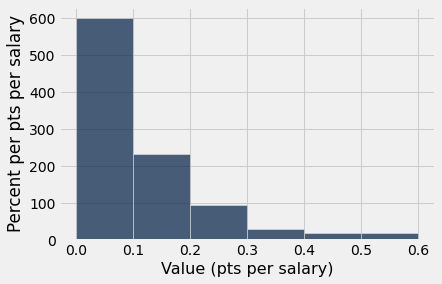

In [32]:
bins = np.arange(0, 0.7, .1) # Use this provided bins when you make your histogram
full_value = full_data.apply(crude_measure)
full_data_with_value = full_data.with_column("Value", full_value)
full_data_with_value.hist("Value", bins=bins, unit="pts per salary")

<!-- END QUESTION -->



Now suppose we weren't able to find out every player's salary (perhaps it was too costly to interview each player).  Instead, we have gathered a *simple random sample* of 50 players' salaries.  The cell below loads those data.

In [33]:
sample_salary_data = Table.read_table("sample_salary_data.csv")
sample_salary_data.show(3)

Name,Salary
D.J. Wilson,2961120
Tyler Cook,101504
Abdel Nader,1618520


<!-- BEGIN QUESTION -->

**Question 3.** Make a histogram of the values of the players in `sample_salary_data`, using the same method for measuring value we used in question 2. Make sure to specify the units again in the histogram as stated in the previous problem. **Use the same bins, too.**  **(3 Points)**

*Hint:* This will take several steps.

<!--
BEGIN QUESTION
name: q3_3
manual: true
-->

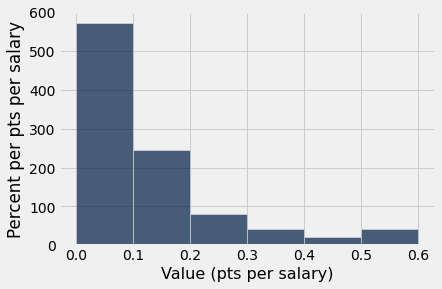

In [34]:
bins = np.arange(0, 0.7, .1) # Use this provided bins when you make your histogram
sample_data = player_data.join('Player', sample_salary_data, 'Name')
sample_value = sample_data.apply(crude_measure)
sample_data_with_value = sample_data.with_column("Value", sample_value)
sample_data_with_value.hist("Value", bins=bins, unit="pts per salary")

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

**Question 4.** For which range of values does the plot in question 3 better depict the distribution of the **population's player values**: 0 to 0.3, or above 0.3? Explain your answer. **(3 Points)**

<!--
BEGIN QUESTION
name: q3_4
manual: true
-->

_Question 3 better depicts the distrubution of the population's player values 0 t0 0.3 because the data are more aligned compared to data that are above 0.3. Also values 0 to 0.3 have more variation which means we can have few larger and/or small values and the actual data won't be affected by much whereas for values above 0.3 has few variation which mans few larger and/or smaller values than actual will have higher impact on the result._

<!-- END QUESTION -->



# Earthquakes

The next cell loads a table containing information about **every earthquake with a magnitude above 5** in 2019 (smaller earthquakes are generally not felt, only recorded by very sensitive equipment), compiled by the US Geological Survey. (source: https://earthquake.usgs.gov/earthquakes/search/)

In [35]:
earthquakes = Table().read_table('earthquakes_2019.csv').select(['time', 'mag', 'place'])
earthquakes

time,mag,place
2019-12-31T11:22:49.734Z,5,"245km S of L'Esperance Rock, New Zealand"
2019-12-30T17:49:59.468Z,5,"37km NNW of Idgah, Pakistan"
2019-12-30T17:18:57.350Z,5.5,"34km NW of Idgah, Pakistan"
2019-12-30T13:49:45.227Z,5.4,"33km NE of Bandar 'Abbas, Iran"
2019-12-30T04:11:09.987Z,5.2,"103km NE of Chichi-shima, Japan"
2019-12-29T18:24:41.656Z,5.2,Southwest of Africa
2019-12-29T13:59:02.410Z,5.1,"138km SSW of Kokopo, Papua New Guinea"
2019-12-29T09:12:15.010Z,5.2,"79km S of Sarangani, Philippines"
2019-12-29T01:06:00.130Z,5,"9km S of Indios, Puerto Rico"
2019-12-28T22:49:15.959Z,5.2,"128km SSE of Raoul Island, New Zealand"


If we were studying all human-detectable 2019 earthquakes and had access to the above data, we’d be in good shape - however, if the USGS didn’t publish the full data, we could still learn something about earthquakes from just a smaller subsample. If we gathered our sample correctly, we could use that subsample to get an idea about the distribution of magnitudes (above 5, of course) throughout the year!

In the following lines of code, we take two different samples from the earthquake table, and calculate the mean of the magnitudes of these earthquakes.

In [36]:
sample1 = earthquakes.sort('mag', descending = True).take(np.arange(100))
sample1_magnitude_mean = np.mean(sample1.column('mag'))
sample2 = earthquakes.take(np.arange(100))
sample2_magnitude_mean = np.mean(sample2.column('mag'))
[sample1_magnitude_mean, sample2_magnitude_mean]

[6.458999999999999, 5.279000000000001]

<!-- BEGIN QUESTION -->

**Question 1.**  Are these samples (`sample1` & `sample2`) representative of the population of earthquakes in the original table (that is, the should we expect the mean to be close to the population mean)? **(4 Points)**

*Hint:* Consider the ordering of the `earthquakes` table. 

<!--
BEGIN QUESTION
name: q4_1
manual: true
-->

_Sample 1 is clearly not the representative of the population of earthquakes in the original table because it takes the average of largest 100 (with respect to mag) earthquakes. Sample 2 might be and might not be the representative of the population of earthquakes in the original table because it takes the mean of first 100 rows which might have been sorted based on when the earthquake happened or might not have been sorted. The samples would be more representative of the orginal table if the rows were randomly taken instead of top 100 or first 100._

<!-- END QUESTION -->

**Question 2.** Write code to produce a sample (without replacement) of size 200 that is representative of the population. Then, take the mean of the magnitudes of the earthquakes in this sample. Assign these to `representative_sample` and `representative_mean` respectively. **(4 Points)**

*Hint:* In class, we learned what kind of samples should be used to properly represent the population.


<!--
BEGIN QUESTION
name: q4_2
manual: false
points:
 - 0
 - 0
 - 2
 - 2
-->

In [37]:
representative_sample = earthquakes.sample(200, with_replacement=False)
representative_mean = np.mean(representative_sample.column("mag"))
representative_mean

5.367999999999999

In [38]:
grader.check("q4_2")

q4_2 results: All test cases passed!

**Question 3.** Suppose we want to figure out what the biggest magnitude earthquake was in 2019, but we only have our representative sample of 200. Let’s see if trying to find the biggest magnitude in the population from a random sample of 200 is a reasonable idea!

Write code that takes many random samples from the `earthquakes` table and finds the maximum of each sample. You should take a random sample of size 200 without replacement and do this 5000 times. Assign the array of maximum magnitudes you find to `maximums`. **(6 Points)**

*Note*: You may use multiple lines in your for loop.

<!--
BEGIN QUESTION
name: q4_3
manual: false
points:
 - 0
 - 3
 - 3
-->

In [39]:
maximums = make_array()
for i in np.arange(5000): 
    sample = earthquakes.sample(200, with_replacement=False)
    maximums = np.append(maximums, max(sample.column("mag")))

In [40]:
grader.check("q4_3")

q4_3 results: All test cases passed!

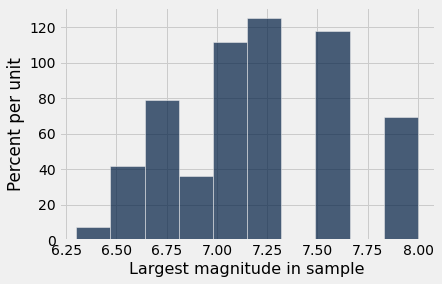

In [41]:
#Histogram of your maximums
Table().with_column('Largest magnitude in sample', maximums).hist('Largest magnitude in sample') 

**Question 4.** Now find the magnitude of the actual strongest earthquake in 2019 (not the maximum of a sample). This will help us determine whether a random sample of size 200 is likely to help you determine the largest magnitude earthquake in the population. **(3 Points)**

<!--
BEGIN QUESTION
name: q4_4
manual: false
points:
 - 0
 - 3
-->

In [42]:
strongest_earthquake_magnitude = earthquakes.sort("mag", descending=True).column("mag").item(0)
strongest_earthquake_magnitude

8.0

In [43]:
grader.check("q4_4")

q4_4 results: All test cases passed!

<!-- BEGIN QUESTION -->

**Question 5.** 
Explain whether you believe you can accurately use a sample size of 200 to determine the maximum. What is one problem with using the maximum as your estimator? Use the histogram above to help answer. **(6 Points)**

<!--
BEGIN QUESTION
name: q4_5
manual: true
-->

_I don't believe we can accurately use a sample size of 200 to determine the maximum because as showed in the histogram above the maximum earthquake we are likely to get with our sample was 7.25, however the actual maximum was 8.0. The one problem with using maximum as our estimator is that we are taking sample size of 200 in random and since our original table has over 1500 rows it is very less likely that we get the maximum mag of earthquakes in our sample._

<!-- END QUESTION -->



## Assessing Jade's Models
#### Games with Jade

Our friend Jade comes over and asks us to play a game with her. The game works like this: 

> We will draw randomly with replacement from a simplified 13 card deck with 4 face cards (A, J, Q, K), and 9 numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10). If we draw cards with replacement 13 times, and if the number of face cards is greater than or equal to 4, we lose.
> 
> Otherwise, Jade loses.

We play the game once and we lose, observing 8 total face cards. We are angry and accuse Jade of cheating! Jade is adamant, however, that the deck is fair.

Jade's model claims that there is an equal chance of getting any of the cards (A, 2, 3, 4, 5, 6, 7, 8, 9, 10, J, Q, K), but we do not believe her. We believe that the deck is clearly rigged, with face cards (A, J, Q, K) being more likely than the numbered cards (2, 3, 4, 5, 6, 7, 8, 9, 10).

#### Question 1
Assign `deck_model_probabilities` to a two-item array containing the chance of drawing a face card as the first element, and the chance of drawing a numbered card as the second element under Jade's model. Since we're working with probabilities, make sure your values are between 0 and 1. **(3 Points)**

<!--
BEGIN QUESTION
name: q5_1
manual: false
points:
 - 0
 - 0
 - 1
 - 2
-->

In [46]:
deck_model_probabilities = make_array(4/13, 9/13)
deck_model_probabilities

array([0.30769231, 0.69230769])

In [47]:
grader.check("q5_1")

q5_1 results: All test cases passed!

**Question 2**

We believe Jade's model is incorrect. In particular, we believe there to be a  larger chance of getting a face card. Which of the following statistics can we use during our simulation to test between the model and our alternative? Assign `statistic_choice` to the correct answer. **(4 Points)**

1. The distance (absolute value) between the actual number of face cards in 13 draws and the expected number of face cards in 13 draws (4)
2. The expected number of face cards in 13 draws (4)
3. The actual number of face cards we get in 13 draws

<!--
BEGIN QUESTION
name: q5_2
manual: false
points:
 - 0
 - 4
-->

In [52]:
statistic_choice = 2
statistic_choice

2

In [53]:
grader.check("q5_2")

q5_2 results: All test cases passed!

#### Question 3

Define the function `deck_simulation_and_statistic`, which, given a sample size and an array of model proportions (like the one you created in Question 1), returns the number of face cards in one simulation of drawing cards under the model specified in `model_proportions`. **(6 Points)**

*Hint:* Think about how you can use the function `sample_proportions`. 

<!--
BEGIN QUESTION
name: q5_3
manual: false
points:
 - 6
-->

In [58]:
def deck_simulation_and_statistic(sample_size, model_proportions):
    return sample_proportions(sample_size, model_proportions).item(0)

deck_simulation_and_statistic(13, deck_model_probabilities)

0.3076923076923077

In [59]:
grader.check("q5_3")

q5_3 results: All test cases passed!

**Question 4** 

Use your function from above to simulate the drawing of 13 cards 5000 times under the proportions that you specified in Question 1. Keep track of all of your statistics in `deck_statistics`. **(5 Points)**

<!--
BEGIN QUESTION
name: q5_4
manual: false
points:
 - 2
 - 3
-->

In [61]:
repetitions = 5000 
deck_statistics = make_array()
for i in np.arange(repetitions):
    num_faces_stats = deck_simulation_and_statistic(13, deck_model_probabilities)
    deck_statistics = np.append(deck_statistics, num_faces_stats)

deck_statistics

array([0.23076923, 0.38461538, 0.15384615, ..., 0.30769231, 0.61538462,
       0.15384615])

In [62]:
grader.check("q5_4")

q5_4 results: All test cases passed!

Let’s take a look at the distribution of simulated statistics.

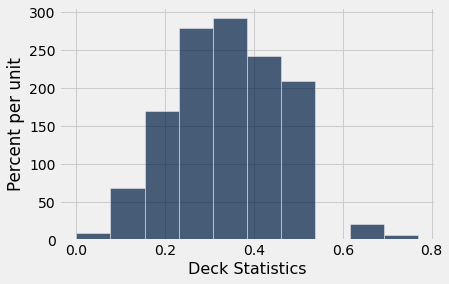

In [63]:
#Draw a distribution of statistics 
Table().with_column('Deck Statistics', deck_statistics).hist()

<!-- BEGIN QUESTION -->

#### Question 5
Given your observed value, do you believe that Jade's model is reasonable, or is our alternative more likely? Explain your answer using the distribution drawn in the previous problem. **(4 Points)**

<!--
BEGIN QUESTION
name: q5_5
manual: true
-->

_I do believe Jade's model is reasonable because from the histogram which we calculated and simulated in random with assumption that the probability of getting any of the card are equal seems to match with the data we get in histogram. More specifically, we made our model to be that there is 4/13 chance of getting face cards and after we simulated randomly the histogram also consistent with our model so Jade's model is reasonable._

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [64]:
grader.check_all()

q1_1 results: All test cases passed!

q1_2 results: All test cases passed!

q1_3 results: All test cases passed!

q1_4 results: All test cases passed!

q2_1 results: All test cases passed!

q2_2 results: All test cases passed!

q2_3 results: All test cases passed!

q2_4 results: All test cases passed!

q2_6 results: All test cases passed!

q3_1 results: All test cases passed!

q4_2 results: All test cases passed!

q4_3 results: All test cases passed!

q4_4 results: All test cases passed!

q5_1 results: All test cases passed!

q5_2 results: All test cases passed!

q5_3 results: All test cases passed!

q5_4 results: All test cases passed!

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [65]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)